## _Loading basis important libraries:_


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### _Importing data from your machine:_


In [3]:
titanic = pd.read_csv(r"C:\Users\22831\Downloads\titanic\train.csv")

# _EDA(Exploratory data analysis):_


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### _Getting the basic info and analyzing the data_


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## _Finding null values are present are not with isna() function_


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### _Drooping the Cabin column as it contain most missing values and more irregular data with different types_


In [8]:
titanic = titanic.drop("Cabin", axis=1)

### _Handling the missing values of the age column with fillna function(since we dont know what to fill so we fill with mean of the age column as the fill values_


In [9]:
titanic.fillna(round(titanic["Age"].mean()), axis=1, inplace=True)

#### _Rechecking for missing values_


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Embarked     891 non-null    object
dtypes: object(11)
memory usage: 76.7+ KB


#### _In order to plot a graph we are changing values to string so that we can plot the count of these survived people_


In [11]:
titanic["Survived"].unique()

array([0, 1], dtype=object)

In [12]:
titanic_clean = titanic.replace({"Survived": {0: "No", 1: "Yes"}})
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


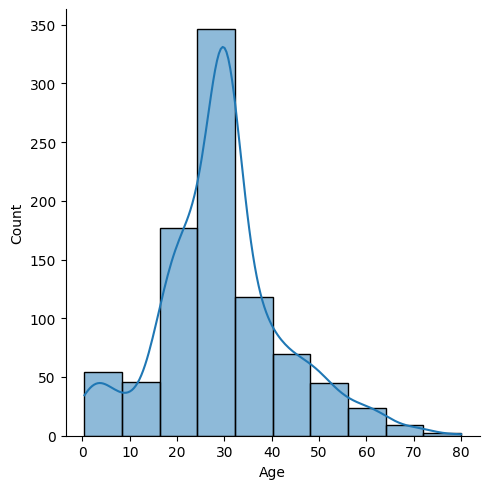

In [13]:
sns.displot(titanic["Age"], kde=True, bins=10)
plt.show()

### _From the above graph we can say that the most of the people present in the ship are middle aged people i.e (20-40)_


### _We know n no of people boarded the ship but we don't know form where they are boarded , In order to find out where they boarded the ship first we need to understand the naming scheme_

### _In the Titanic dataset, "Embarked" refers to the port where a passenger boarded the ship, with the values "C" representing Cherbourg, "Q" representing Queenstown, and "S" representing Southampton_


In [14]:
boarded_people = titanic_clean["Embarked"].value_counts()
boarded_people = boarded_people.reset_index()
boarded_people.columns = ["Embarked", "Count"]
boarded_people["Embarked"] = boarded_people["Embarked"].replace(
    {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown", 30: "Other places"}
)
boarded_people

,Embarked,Count
0,Southampton,644
1,Cherbourg,168
2,Queenstown,77
3,Other places,2


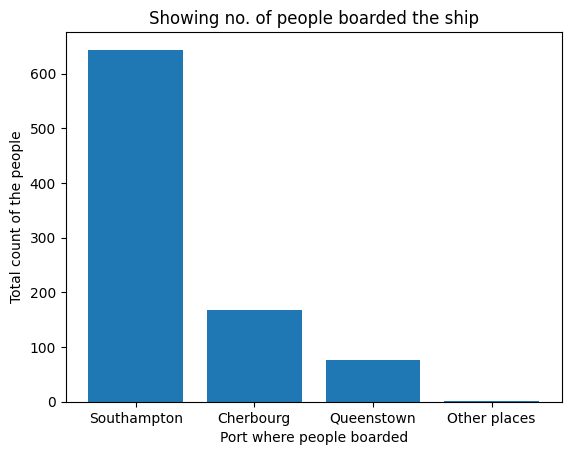

In [15]:
plt.bar(boarded_people["Embarked"], boarded_people["Count"])
plt.ylabel("Total count of the people")
plt.xlabel("Port where people boarded")
plt.title("Showing no. of people boarded the ship")
plt.show()

### _From the above bar plot we can see that "Southampton" is the place where most of the people boarded the ship_


## _Below is the plot of people survived with different sex, as we can say that most survivors are male compared to female_


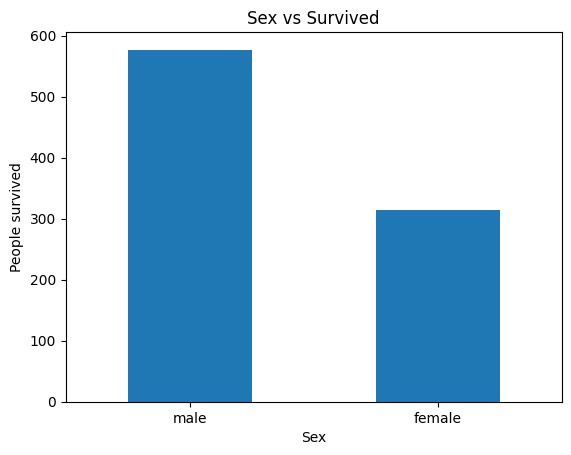

In [16]:
titanic_age = titanic_clean["Sex"].value_counts()
titanic_age.plot(kind="bar")
plt.ylabel("People survived")
plt.xlabel("Sex")
plt.title("Sex vs Survived")
plt.xticks(rotation=360)
plt.show()

## _A simple bar plot showing male and female where male survived ~65% and female survived ~35%_


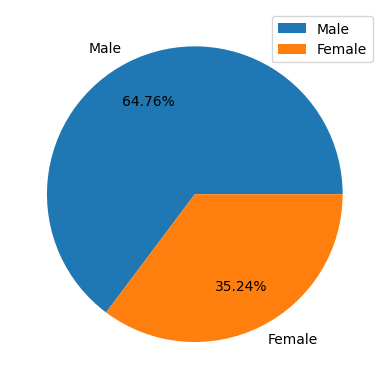

In [17]:
plt.pie(titanic_age, labels=["Male", "Female"], autopct="%1.2f%%", pctdistance=0.7)
plt.legend()
plt.show()

## _Hear we are creating a new feature "FAMILY" as a new and we are plotting the no of people survived from different family sizes_


In [18]:
titanic_family = titanic[["SibSp", "Parch"]]
titanic_family.isna().sum()

SibSp    0
Parch    0
dtype: int64

In [19]:
titanic_family["size"] = titanic_family["SibSp"] + titanic_family["Parch"] + 1
titanic_family_feature = titanic_family.value_counts()
titanic_family_feature = titanic_family_feature.reset_index()
titanic_family_feature.columns = ["Sib/sp", "Par/ch", "Size of family", "Count"]
titanic_family_feature

C:\Users\22831\AppData\Local\Temp\ipykernel_228\3250665540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_family["size"] = titanic_family["SibSp"] + titanic_family["Parch"] + 1


,Sib/sp,Par/ch,Size of family,Count
0,0,0,1,537
1,1,0,2,123
2,1,1,3,57
3,0,1,2,38
4,0,2,3,29
5,1,2,4,19
6,2,0,3,16
7,4,2,7,9
8,4,1,6,9
9,3,2,6,7


### _Simple bar graph showing that the no of families with respect to no of people boarded_


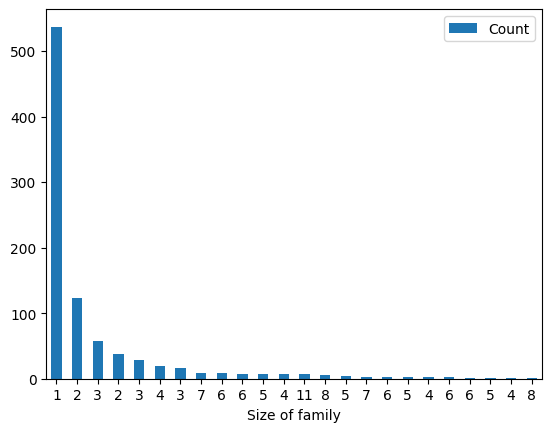

In [26]:
titanic_family_feature.plot("Size of family", "Count", kind="bar")
plt.xticks(rotation=360)
plt.show()

### _Note: X-axis contains duplicates ,for example any family has 2 as their family size but any family can have diffrent combinations of siblings/spouse and parents/children._


In [21]:
titanic_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.45,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C


In [22]:
titanic_clean["Family members"] = titanic_clean["SibSp"] + titanic_clean["Parch"] + 1
titanic_clean["FamilySize"] = pd.cut(
    titanic_clean["Family members"],
    bins=[0, 1, 5, 11],
    labels=["alone", "small", "large"],
)
titanic_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family members,FamilySize
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,2,small
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,small
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,1,alone
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S,2,small
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,S,1,alone
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S,1,alone
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.45,S,4,small
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C,1,alone


In [23]:
titanic_family_size = titanic_clean["FamilySize"].value_counts()
titanic_family_size = titanic_family_size.reset_index()
titanic_family_size.columns = ["Family Size", "Count"]
titanic_family_size

,Family Size,Count
0,alone,537
1,small,307
2,large,47


## _Bar plot showing that families that families showing as 0-'Alone',1-'Small',2-'Large' families as the representation_


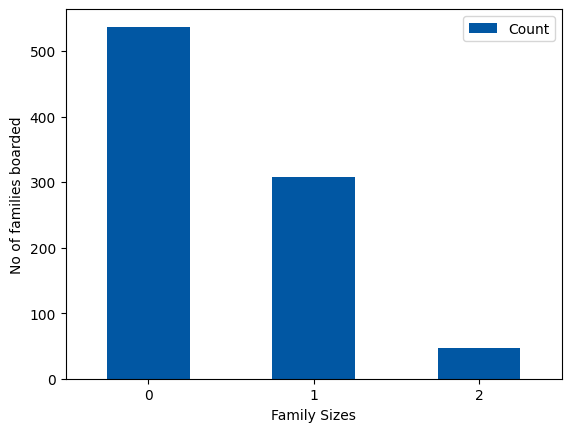

In [24]:
titanic_family_size.plot(kind="bar", color="#0157a3")
plt.xticks(rotation=360)
plt.xlabel("Family Sizes")
plt.ylabel("No of families boarded")
plt.show()

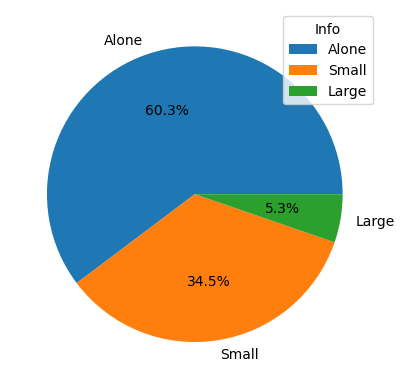

In [27]:
plt.pie(
    titanic_family_size["Count"], labels=["Alone", "Small", "Large"], autopct="%1.1f%%"
)
plt.legend(title="Info")
plt.show()